In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# reading the files for the analysis
cityOrig = pd.read_csv('city_data.csv')
rideOrig = pd.read_csv('ride_data.csv')

In [47]:
cityOrig.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [49]:
rideOrig.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [3]:
# combine the data into a single data set
combo = pd.merge(cityOrig, rideOrig, on='city')
combo.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [28]:
# filtering for urban cities and calculating total rides and average fares
urban = combo.loc[(combo['type'] == 'Urban')]
u_totRides = urban.groupby(['city']) ['ride_id'].count()
u_avgFare = urban.groupby(['city']) ['fare'].mean()
u_drivers = urban.groupby(['city']) ['driver_count'].sum() / 2

urban.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


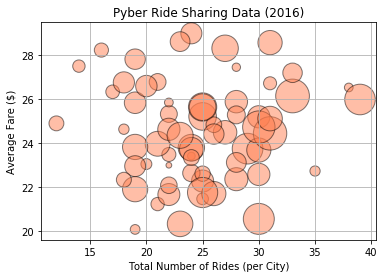

In [29]:
urban_plt = plt.scatter(u_totRides, u_avgFare, s=u_drivers, alpha=.5, color='coral',edgecolors='black')
plt.xlabel("Total Number of Rides (per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")
plt.grid()
plt.show(urban_plt)

In [30]:
# filtering for suburban cities and calculating total rides and average fares
burbs = combo.loc[(combo['type'] == 'Suburban')]
s_totRides = burbs.groupby(['city']) ['ride_id'].count()
s_avgFare = burbs.groupby(['city']) ['fare'].mean()
s_drivers = burbs.groupby(['city']) ['driver_count'].sum() / 2

burbs.head()

,city,driver_count,type,date,fare,ride_id
1625,Port Shane,7,Suburban,2018-04-09 15:34:40,27.66,4022340141966
1626,Port Shane,7,Suburban,2018-04-23 16:05:47,42.26,8341982666719
1627,Port Shane,7,Suburban,2018-03-02 12:06:00,14.95,2803204948363
1628,Port Shane,7,Suburban,2018-03-26 04:33:30,19.03,6010401984537
1629,Port Shane,7,Suburban,2018-03-15 12:09:42,31.58,2552978514662


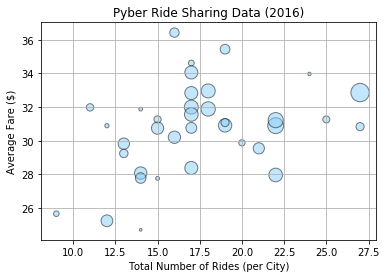

In [31]:
burb_plt = plt.scatter(s_totRides, s_avgFare, s=s_drivers, alpha=.5, color='lightskyblue',edgecolors='black')
plt.xlabel("Total Number of Rides (per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")
plt.grid()
plt.show(burb_plt)

In [32]:
# filtering for rural cities and calculating total rides and average fares
rural = combo.loc[(combo['type'] == 'Rural')]
r_totRides = rural.groupby(['city']) ['ride_id'].count()
r_avgFare = rural.groupby(['city']) ['fare'].mean()
r_drivers = rural.groupby(['city']) ['driver_count'].sum() / 2

rural.head()

,city,driver_count,type,date,fare,ride_id
2250,South Jennifer,7,Rural,2018-04-01 09:32:45,21.63,9135979586871
2251,South Jennifer,7,Rural,2018-03-07 19:10:13,48.79,9730627367446
2252,South Jennifer,7,Rural,2018-04-05 14:35:42,32.20,683983658392
2253,South Jennifer,7,Rural,2018-04-02 10:26:50,14.11,3828267773041
2254,South Jennifer,7,Rural,2018-04-10 20:46:11,43.25,623928772332


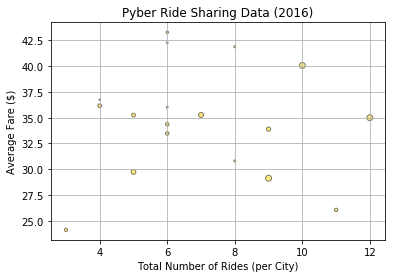

In [33]:
rural_plt = plt.scatter(r_totRides, r_avgFare, s=r_drivers, alpha=.5, color='gold',edgecolors='black')
plt.xlabel("Total Number of Rides (per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")
plt.grid()
plt.show(rural_plt)

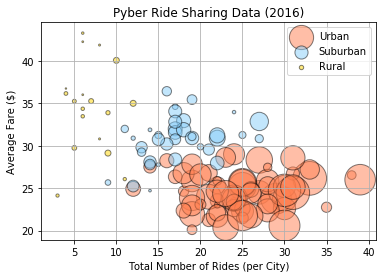

In [37]:
# 6th time is a charm??? Holy crap, I finally got this to cooperate
# plotting multiple plots on one graph

# creates a new figure
fig = plt.figure()
# adds a subplot to the current figure
ax1 = fig.add_subplot(111)
# creates the contents of the scatter plot
ax1.scatter(u_totRides, u_avgFare, s=u_drivers, alpha=0.5, c='coral', edgecolors='black', label='Urban')
ax1.scatter(s_totRides, s_avgFare, s=s_drivers, alpha=0.5, c='lightskyblue', edgecolors='black', label='Suburban')
ax1.scatter(r_totRides, r_avgFare, s=r_drivers, alpha=0.5, c='gold', edgecolors='black', label='Rural')

plt.legend(loc='upper right')
plt.xlabel("Total Number of Rides (per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")
plt.grid()
plt.show()

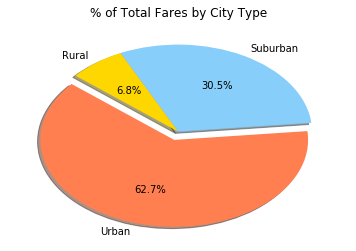

In [43]:
# calculating total fares by city type
u_totFares = urban.groupby(['type']) ['fare'].sum()
s_totFares = burbs.groupby(['type']) ['fare'].sum()
r_totFares = rural.groupby(['type']) ['fare'].sum()

# labels for the sections of our pie chart
labels = ['Urban', 'Suburban', 'Rural']

# the values of each section of the pie chart
sizes = [u_totFares, s_totFares, r_totFares]

# the colors of each section of the pie chart
colors = ['coral', 'lightskyblue', 'gold']

# tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0)

# creates the pie chart based upon the values above
# automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("% of Total Fares by City Type")
plt.show()

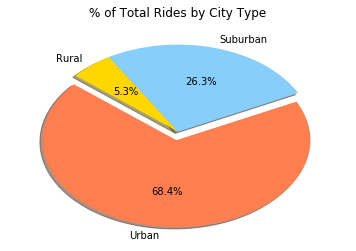

In [44]:
# calculating total rides by city type
u_totRides = urban.groupby(['type']) ['ride_id'].count()
s_totRides = burbs.groupby(['type']) ['ride_id'].count()
r_totRides = rural.groupby(['type']) ['ride_id'].count()

# labels for the sections of our pie chart
labels = ['Urban', 'Suburban', 'Rural']

# the values of each section of the pie chart
sizes = [u_totRides, s_totRides, r_totRides]

# the colors of each section of the pie chart
colors = ['coral', 'lightskyblue', 'gold']

# tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0)

# creates the pie chart based upon the values above
# automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("% of Total Rides by City Type")
plt.show()


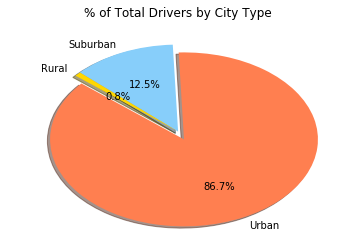

In [56]:
# calculating total drivers by city type
u_totDrivers = urban.groupby(['type']) ['driver_count'].sum() 
s_totDrivers = burbs.groupby(['type']) ['driver_count'].sum() 
r_totDrivers = rural.groupby(['type']) ['driver_count'].sum() 



# labels for the sections of our pie chart
labels = ['Urban', 'Suburban', 'Rural']

# the values of each section of the pie chart
sizes = [u_totDrivers, s_totDrivers, r_totDrivers]

# the colors of each section of the pie chart
colors = ['coral', 'lightskyblue', 'gold']

# tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0)

# creates the pie chart based upon the values above
# automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("% of Total Drivers by City Type")
plt.show()

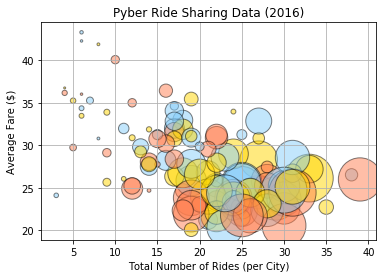

In [10]:
# attempt 5 - fail

x = np.concatenate((u_totRides, s_totRides, r_totRides))
y = np.concatenate((u_avgFare, s_avgFare, r_avgFare))
s = np.concatenate((u_drivers, s_drivers, r_drivers))
color_array = ['coral'] + ['lightskyblue'] + ['gold']
combined = plt.scatter(x, y, s=s, alpha=0.5, color=color_array, edgecolors='black')
plt.xlabel("Total Number of Rides (per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")
plt.grid()
plt.show(combined)

In [11]:
# attempt #4 - fail
plt.show(rural_plt, burb_plt, urban_plt)

TypeError: show() takes from 0 to 2 positional arguments but 3 were given

In [ ]:
# combine plots test 1 - fail
r_combo, = plt.scatter(r_totRides, r_avgFare, s=r_drivers, alpha=.5, color='gold',edgecolors='black')
s_combo, = plt.scatter(s_totRides, s_avgFare, s=s_drivers, alpha=.5, color='lightskyblue',edgecolors='black')
u_combo, = plt.scatter(u_totRides, u_avgFare, s=u_drivers, alpha=.5, color='coral',edgecolors='black')
plt.grid()
plt.xlabel("Total Number of Rides (per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")
plt.show()

In [ ]:
# attempt #2 - fail

# set up for bubble chart
u_grp = pd.DataFrame({'Total Rides': u_totRides, 'Average Fare': u_avgFare})
s_grp = pd.DataFrame({'Total Rides': s_totRides, 'Average Fare': s_avgFare})
r_grp = pd.DataFrame({'Total Rides': r_totRides, 'Average Fare': r_avgFare})

data = (u_grp, s_grp, r_grp)
colors = ('coral', 'lightskyblue', 'gold')
groups = ('Urban', 'Suburban', 'Rural')
areas = (rural['driver_count'], burbs['driver_count'], rural['driver_count'])

# create the bubble chart
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

for data, color, group, area in zip(data, colors, groups, areas):
    x,y = data
    ax.scatter(x, y, alpha=0.5, c=color, edgecolors='black', s=area)

plt.xlabel("Total Number of Rides (per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")
plt.legend(loc="upper right")
plt.show()

In [ ]:
cityGrp = combo.groupby(['type','city'])
urban = cityGrp.loc[(cityGrp['type'] == 'Urban')]
display(urban)
totRides = cityGrp['ride_id'].count()
avgFare = cityGrp['fare'].mean()
numDrivers = cityGrp['driver_count'].sum()

In [ ]:
# creating containers for the x, y, s values for scatter
# need to figure out the color situation - bookmarked names of colors >> how to assign to city_type??? 
# may need to pull in each city type separately and then combine into one scatter - yes

x = []
y = []
area = []

for data in cityGrp:
    x.append(totRides)
    y.append(avgFare)
    area.append(numDrivers / 3)


plt.scatter(x, y, s=area, alpha=.5, color=['gold','lightskyblue','coral'],edgecolors='black')
plt.xlabel("Total Number of Rides (per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")
plt.show()

In [ ]:
# creating containers for the x, y, s values for scatter
# need to figure out the color situation - bookmarked names of colors >> how to assign to city_type??? 
# may need to pull in each city type separately and then combine into one scatter - yes
t_totRides = combo['ride_id'].count()
t_avgFare = combo['fare'].mean()
t_numDrivers = combo['driver_count'].sum()

x_urban = []
y_urban = []
area_urban = []

for data in combo:
    print(data)
#     if data['type'] == 'Urban':
#         x_urban.append(t_totRides)
#         y_urban.append(t_avgFare)
#         area_urban.append(t_numDrivers / 3)

# urban, = plt.scatter(x_urban, y_urban, s=area_urban, alpha=.5, color='coral', edgecolors='black')
# #suburban, = plt.plot()
# #rural, = plt.plot()
# #plt.scatter(x, y, s=area, alpha=.5, color=['gold','lightskyblue','coral'],edgecolors='black')
# plt.xlabel("Total Number of Rides (per City)")
# plt.ylabel("Average Fare ($)")
# plt.title("Pyber Ride Sharing Data (2016)")
# plt.legend(loc="upper right")
# plt.show()

In [ ]:
# attempt number 3 - fail

plt.scatter(u_totRides, s_totRides, u_avgFare, s_avgFare, s=[s=u_drivers, s_drivers], alpha=.5, color=['gold','lightskyblue'],edgecolors='black')
plt.xlabel("Total Number of Rides (per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")
plt.show()